# Introduction to the Monte Carlo method

----

Start by defining the [Gibbs (or Boltzmann) distribution](https://en.wikipedia.org/wiki/Boltzmann_distribution):
$$P(\alpha) = e^{-E(\alpha)/kT}$$
this expression, defines the probability of observing a particular configuration of spins, $\alpha$. 
As you can see, the probability of $\alpha$ decays exponentially with increasing energy of $\alpha$, $E(\alpha)$,
where $k$ is the Boltzmann constant, $k = 1.38064852 \times 10^{-23} J/K$
and $T$ is the temperature in Kelvin. 

## What defines the energy of a configuration of spins? 
Given a configuration of spins (e.g., $\uparrow\downarrow\downarrow\uparrow\downarrow$) we can define the energy using what is referred to as an Ising Hamiltonian:
$$ \hat{H}' = \frac{\hat{H}}{k} = -\frac{J}{k}\sum_{<ij>} s_is_j,$$
where, $s_i=1$ if the $i^{th}$ spin is `up` and $s_i=-1$ if it is `down`, and the brackets $<ij>$ indicate a sum over spins that are connected,
and $J$ is a constant that determines the energy scale. 
The energy here has been divided by the Boltzmann constant to yield units of temperature. 
Let's consider the following case, which has the sites connected in a single 1D line:
$$\alpha = \uparrow-\downarrow-\downarrow-\uparrow-\downarrow.$$ 
What is the energy of such a configuration?
$$ E(\alpha)' = J/k(-1 + 1 - 1 - 1) = \frac{E(\alpha)}{k} = -2J/k$$

## P1: Write a class that defines a spin configuration

In [119]:
class spinConfiguration:
    
        def __init__(self, binaryConfiguration, numElements):
#     number of elements in list of spins
            self.numElements = numElements
            self.spins = self.getSpins(binaryConfiguration)
            
        def getSpins(self, binaryConfiguration):
            spinList = []
            bitList = [bit for bit in bin(binaryConfiguration)][2:self.numElements + 2]
            while(len(bitList) < self.numElements):
                bitList.insert(0,'0')
            
            for bitChar in bitList:
                if(bitChar == '0'):
                    spinList.append(-1)
                else:
                    spinList.append(1)
            return spinList
        
        def getNumElements(self):
            return self.numElements
        
        def calculateMagnetism(self):
            magnetism = 0
            for i in range(self.numElements):
                magnetism += self.spins[i]
            return magnetism;
            

## P2: Write a class that defines the 1D hamiltonian, containing a function that computes the energy of a configuration

In [145]:
class SingleDimensionHamiltionian:
#     k constant, arbitrarily sent to 1
    
#     constructor
    def __init__(self, J, mu, spinConfiguration):
        self.k = 1;
        self.J = J
        self.mu = mu
        self.spinConfiguration = spinConfiguration
        self.Hamiltonian = self.calculateHamiltonian()
        
    def calculateHamiltonian(self):
        factor = -1 * self.J / self.k
        spinSums = 0
#         nested loops calculate alignment factor for each pair of elements
        for i in range(0, self.spinConfiguration.getNumElements()):
            for j in range(0, self.spinConfiguration.getNumElements()):
                if(i != j):
                    spinSums += self.spinConfiguration.spins[i] * self.spinConfiguration.spins[j]
        return factor * spinSums
                    
        
    def calculateEnergy(self):
        sumOfProductsOfSpins = 0
        sumOfSpins = 0
        for i in range(self.spinConfiguration.numElements):
            sumOfSpins += self.spinConfiguration.spins[i]
            for j in range(1, self.spinConfiguration.numElements):
                if(i + 1 == j):
                    sumOfProductsOfSpins += self.spinConfiguration.spins[i] * self.spinConfiguration.spins[j]
        sumOfProductsOfSpins += self.spinConfiguration.spins[0] * self.spinConfiguration.spins[self.spinConfiguration.numElements - 1]
        firstComponent = -1 * self.J * sumOfProductsOfSpins
        secondComponent = self.mu * sumOfSpins
        
        
        instanceEnergy = firstComponent + secondComponent
        return instanceEnergy


## Ising 2:

In [146]:
# for now only produces the configurations with two elements, should change soon
def generateSpinConfigurations(n):
    #generate spin configurations 
    spinConfigurations = []#convert each List in spinConfigurationsLists in SpinConfiguration object
    for binaryConfiguration in range(2 ** n):
        spinConfigurations.append(spinConfiguration(binaryConfiguration, n))

    return spinConfigurations

In [147]:
import math

# calculates averageEnergy, averageMagnetism, HeatCapacity, and Magnetic Susceptibility
def calculateValues(temperature, J, mu, latticeLength):
    #set k constant
    k = 1
    
    #instantiate probability variable
    totalProbability = 0

    #instantiate lists for Energies and Probabilities
    energies = []
    energiesSquared = []
    magnetisms = []
    magnetismsSquared = []
    probabilities = []
 
    #calculate spinConfiguration
    spinConfigurations = generateSpinConfigurations(latticeLength)
    
    #calculate Energies and Magnetisms for each spin configuration
    for i in range(len(spinConfigurations)):
#         define spinConfiguration and Hamiltonian for given instance
        instanceSpinConfiguration = spinConfigurations[i];
        instanceHamiltonian = SingleDimensionHamiltionian(J, mu, instanceSpinConfiguration)
        
#         add instance values to energies, magnetisms, and probabilities lists
        instanceEnergy = instanceHamiltonian.calculateEnergy()
        energies.append(instanceEnergy)
        instanceMagnetism = instanceSpinConfiguration.calculateMagnetism();
        magnetisms.append(instanceMagnetism)
        instanceProbability = math.e ** ((-1 * instanceEnergy) / temperature)
        probabilities.append(instanceProbability)
        
#         add instance probability to totalProbability
#         print("instanceProbability {}: {}".format(i, instanceProbability))
        totalProbability += instanceProbability
#     print("totalprobability: {}".format(totalProbability))
#     calculate Average Energy and Magnetism and EnergySquared and MagnetismSquared
    averageEnergyNumerator = 0
    averageEnergySquaredNumerator = 0
    averageMagnetismNumerator = 0
    averageMagnetismSquaredNumerator = 0
    
    
#     print(energies)
#     print(probabilities)
    for i in range(len(energies)):
#         print("instanceEnergy {}: {}".format(i, energies[i]))
#         print("instanceMagnetism {}: {}".format(i, magnetisms[i]))
        averageEnergyNumerator += energies[i] * probabilities[i]
        averageEnergySquaredNumerator += energies[i] * energies[i] * probabilities[i]
        averageMagnetismNumerator += magnetisms[i] * probabilities[i]
        averageMagnetismSquaredNumerator += magnetisms[i] * magnetisms[i] * probabilities[i]
    
#     print("averageEnergyNumerator: {}".format(averageEnergyNumerator))
    averageEnergy = averageEnergyNumerator / totalProbability
    averageEnergySquared = averageEnergySquaredNumerator / totalProbability
    averageMagnetism = averageMagnetismNumerator / totalProbability
    averageMagnetismSquared = averageMagnetismSquaredNumerator / totalProbability

    # return results as a dictionary
    return {"averageEnergy": averageEnergy, 
            "averageEnergySquared": averageEnergySquared,
            "averageMagnetism": averageMagnetism,
            "averageMagnetismSquared": averageMagnetismSquared,
            "temperature": temperature
           }

In [148]:
# function to calculate heat capacity
def calculateHeatCapacity(averageEnergySquared, averageEnergy, temperature):
    k = 1
    #      (<EE> - <E><E> ) / (kTT)
    return (averageEnergySquared - (averageEnergy ** 2)) / (k * (temperature ** 2))
    

# function to calculate magnetic susceptibility
def calculateMagneticSusceptibilty(averageMagnetismSquared, averageMagnetism, temperature):       
    k = 1                                        
    # (<MM> - <M><M> ) / (kT)
    return (averageMagnetismSquared - (averageMagnetism ** 2)) / (k * temperature)

In [149]:
# calculate values for each category to be plotted
import matplotlib.pyplot as plt
temperatureValues = []
averageEnergyValues = []
averageMagnetismValues = []
heatCapacityValues = []
magneticSusceptibilityValues = []
for t in range(1,100):
    currentTemp = t / 10
    temperatureValues.append(currentTemp)
#     call calculateValues
    values = calculateValues(currentTemp, -2, 1.1, 8)
#     add averageEnergy and averageMagnetism values to lists
    averageEnergyValues.append(values["averageEnergy"])
    
    averageMagnetismValues.append(values["averageMagnetism"])
    
#     add heatCapacity value to list
    heatCapacityValues.append(calculateHeatCapacity(values["averageEnergySquared"], values["averageEnergy"], values["temperature"]))
# add magnetic susceptibility value to list
    magneticSusceptibilityValues.append(calculateMagneticSusceptibilty(values["averageMagnetismSquared"], values["averageMagnetism"], values["temperature"]))

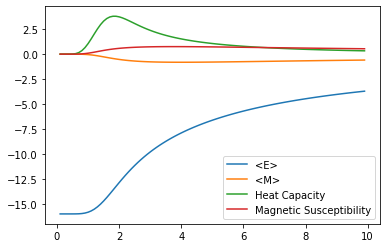

In [150]:
# plot average energy values
plt.plot(temperatureValues, averageEnergyValues, label="<E>")
plt.plot(temperatureValues, averageMagnetismValues, label="<M>")
plt.plot(temperatureValues, heatCapacityValues, label="Heat Capacity")
plt.plot(temperatureValues, magneticSusceptibilityValues, label="Magnetic Susceptibility")
plt.legend()
plt.show()

## Q3: What is the energy for (++-+---+--+)?

In [151]:
conf = spinConfiguration(1673, 11)
print(conf.spins)
# Define my hamiltonian values
ham = SingleDimensionHamiltionian(-2, 1.1, conf)
print("Energy: {}".format(ham.calculateEnergy()))
print("Magnetism: {}".format(conf.calculateMagnetism()))



# Compute the average values for Temperature = 1
# values = calculateValues(1, -2, 1.1, 2)
# # E, M, HC, MS, T = 
# E = values["averageEnergy"]
# M = values["averageMagnetism"]
# # print(" E  = %12.8f" %E)
# print(E)
# print(M)

[1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1]
Energy: -3.1
Magnetism: -1


In [152]:
# Define a new configuration instance for a 2-site lattice
conf = spinConfiguration(2, 2)

# Define my hamiltonian values
ham = SingleDimensionHamiltionian(-2, 1.1, conf)




# Compute the average values for Temperature = 1
values = calculateValues(1, -2, 1.1, 2)
# E, M, HC, MS, T = 
E = values["averageEnergy"]
M = values["averageMagnetism"]
# print(" E  = %12.8f" %E)
print(E)
print(M)
# print(" M  = %12.8f" %M)
# print(" HC = %12.8f" %HC)
# print(" MS = %12.8f" %MS)

-3.991044246074882
-0.002985809084722466


## Properties
For any fixed state, $\alpha$, the `magnetization` ($M$) is proportional to the _excess_ number of spins pointing up or down while the energy is given by the
Hamiltonian:
$$M(\alpha) = N_{\text{up}}(\alpha) - N_{\text{down}}(\alpha).$$
As a dynamical, fluctuating system, each time you measure the magnetization, the system might be in a different state ($\alpha$) and so you'll get a different number!
However, we already know what the probability of measuring any particular $\alpha$ is, so in order to compute the average magnetization, $\left<M\right>$, we just need to multiply the magnetization of each possible configuration times the probability of it being measured, and then add them all up!
$$ \left<M\right> = \sum_\alpha M(\alpha)P(\alpha).$$
In fact, any average value can be obtained by adding up the value of an individual configuration multiplied by it's probability:
$$ \left<E\right> = \sum_\alpha E(\alpha)P(\alpha).$$

This means that to obtain any average value (also known as an `expectation value`) computationally, we must compute the both the value and probability of all possible configurations. This becomes extremely expensive as the number of spins ($N$) increases. 

## P3: Write a function that computes the magnetization of a spin configuration

## Q2: How many configurations are possible for:

(a) N=10?

(b) N=100?

(c) N=1000?

## Testing Functions

In [25]:
def testSpinConfiguration():
    assert(spinConfiguration(0, 2).spins == [-1, -1])    
    assert(spinConfiguration(2, 2).spins == [1, -1])
    assert(spinConfiguration(1, 4).spins == [-1, -1, -1, 1])
    assert(spinConfiguration(15, 4).spins == [1, 1, 1, 1])
testSpinConfiguration()


In [ ]:
def testSingleDimensionHamiltonian():
    assert()
testSingleDimensionHamiltonian()